In [ ]:
import torch
from matplotlib import pyplot as plt

In [ ]:
video_dir = 'datasets/mp4/'
json_dir = 'datasets/data/'
label_dir = 'datasets/cfg/'
list_file = 'datafiles.txt'

In [ ]:
import numpy as np
import pandas as pd
import os
with open(list_file,'w') as datafiles:
    filelist = os.listdir(video_dir)
    for i in filelist:
        datafiles.write(i[:-4]+',')

In [ ]:
filelist = []
with open(list_file,'r') as file:
    line = file.readline()
    filelist = line.split(',')

In [ ]:
import cv2 as cv

cap = cv.VideoCapture(video_dir + filelist[0]+'.mp4')

motion = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    img = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    motion.append(img)

    cv.imshow('frame', img)
    if cv.waitKey(1) == ord('q'):
        break
cap.release()
cv.waitKey()
cv.destroyAllWindows()


In [ ]:
plt.imshow(motion[0],cmap='gray')

In [ ]:
cv.imwrite('temp.png', motion[0])
img = cv.imread("temp.png")
#plt.imshow(img,cmap='gray')
#print(type(img))
#print(img)


In [ ]:
PaddingImage = np.pad(motion[0],((1,1),(1,1)))
plt.imshow(PaddingImage,cmap='gray')
PaddingImage

In [ ]:
#Con_kernel = [1,1,1,1,1,1,1,1,1]
#Con_kernel = [1,1,1,1,2,1,1,1,1] #sharper
Con_kernel = [1,2,1,2,4,2,1,2,1]

#Con_kernel = [0,-1,0,-1,5,-1,0,-1,0]
#Con_kernel = [-1,-1,-1,-1,9,-1,-1,-1,-1] 
#Con_kernel = [1,-2,1,-2,5,-2,1,-2,1] 

#Con_kernel = [-1,0,-1,0,4,0,-1,0,-1]
#Con_kernel = [-1,-1,-1,-1,8,-1,-1,-1,-1]

#Con_kernel = [-1,0,1,-2,0,2,-1,0,1]
#Con_kernel = [1,2,1,0,0,0,-1,-2,-1]
#Con_kernel = [2,1,0,1,0,-1,0,-1,-2]

In [ ]:
print(PaddingImage.shape)
img_width = PaddingImage.shape[0]
img_height =PaddingImage.shape[1]
print(img_width,img_height)

In [ ]:
Pixel_list = []
tmp = [[-1,-1],[-1, 0],[-1, 1],
       [ 0,-1],[ 0, 0],[ 0, 1],
       [ 1,-1],[ 1, 0],[ 1, 1]]

for i in range(1,img_width):
    for j in range(1,img_height):
        neighbourlist = []
        for k in range(0,9):
            neighbourlist.append(PaddingGreyTestImage[i+tmp[k][0]][j+tmp[k][1]] * Con_kernel[k])
        Pixel_list.append(sum(neighbourlist))

conv_image = np.array(Pixel_list).reshape(512,512)

In [1]:
from BandaiDataset import BandaiDataset 

data = BandaiDataset()

In [2]:
data.load()

dataset-1_bow_active_001: stream end
dataset-1_bow_angry_001: stream end
dataset-1_bow_childish_001: stream end
dataset-1_bow_chimpira_001: stream end
dataset-1_bow_feminine_001: stream end
dataset-1_bow_giant_001: stream end
dataset-1_bow_happy_001: stream end
dataset-1_bow_masculinity_001: stream end
dataset-1_bow_musical_001: stream end
dataset-1_bow_normal_001: stream end
dataset-1_bow_not-confident_001: stream end
dataset-1_bow_old_001: stream end
dataset-1_bow_proud_001: stream end
dataset-1_bow_sad_001: stream end
dataset-1_bow_tired_001: stream end
dataset-1_byebye_active_001: stream end
dataset-1_byebye_angry_001: stream end
dataset-1_byebye_childish_001: stream end
dataset-1_byebye_chimpira_001: stream end
dataset-1_byebye_feminine_001: stream end
dataset-1_byebye_giant_001: stream end
dataset-1_byebye_happy_001: stream end
dataset-1_byebye_masculinity_001: stream end
dataset-1_byebye_musical_001: stream end
dataset-1_byebye_normal_001: stream end
dataset-1_byebye_not-confide

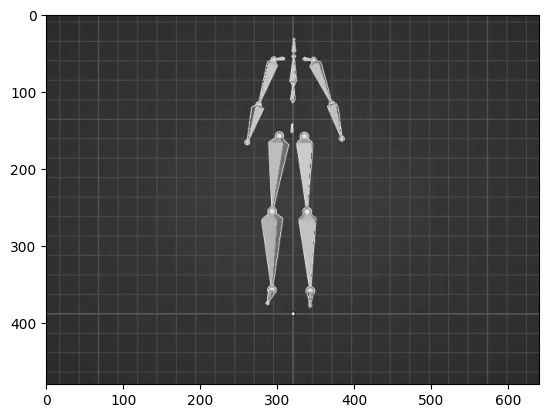

In [6]:
data[0].draw_pose(0)